In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [38]:
# Set agg.path.chunksize to Avoid Overflow

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [3]:
#set path
path = r'C:\Users\nrsmi\Documents\CareerFoundry\New_York_CitiBike_Analysis'

In [15]:
# import df
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'NYCitiBike_Weather_Data.csv'), index_col = 0 )

C:\Users\nrsmi\AppData\Local\Temp\ipykernel_22276\3046899320.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'NYCitiBike_Weather_Data.csv'), index_col = 0 )


In [16]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


# 3. Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, use a pandas plotting function

In [20]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [22]:
df.shape

(29838166, 15)

In [24]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [34]:
# set the date column to be the index of the dataframe in a copy
df_temp = df.set_index('date')

In [31]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


<Axes: xlabel='date'>

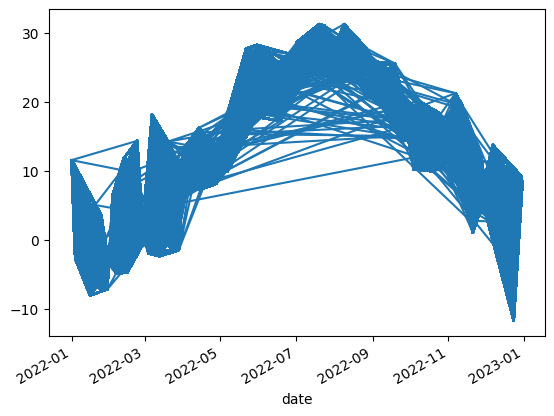

In [40]:
df_temp['avgTemp'].plot()

In [50]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [150]:
#reset index and create average temperatures for each unique date

df_avgTemp_by_date = df_temp.groupby('date')['avgTemp'].mean().reset_index()

In [54]:
df_avgTemp_by_date.columns

Index(['date', 'avgTemp'], dtype='object')

In [152]:
#sort values by date
df_avgTemp_by_date = df_avgTemp_by_date.sort_values(by='date')

In [154]:
# set the index
df_avgTemp_by_date.set_index('date', inplace=True)

In [64]:
df_avgTemp_by_date.head()

,avgTemp
date,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


<Axes: xlabel='date'>

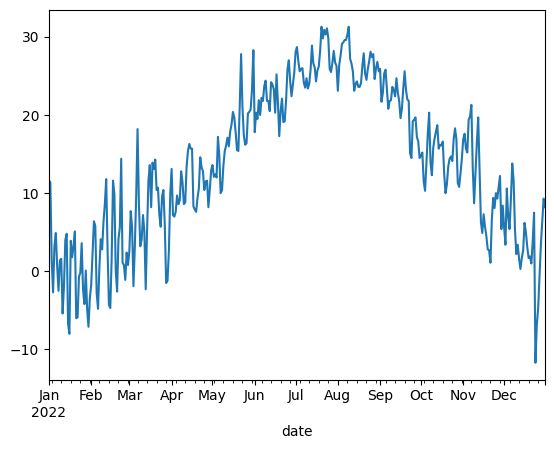

In [82]:
#plot the data
df_avgTemp_by_date['avgTemp'].plot()

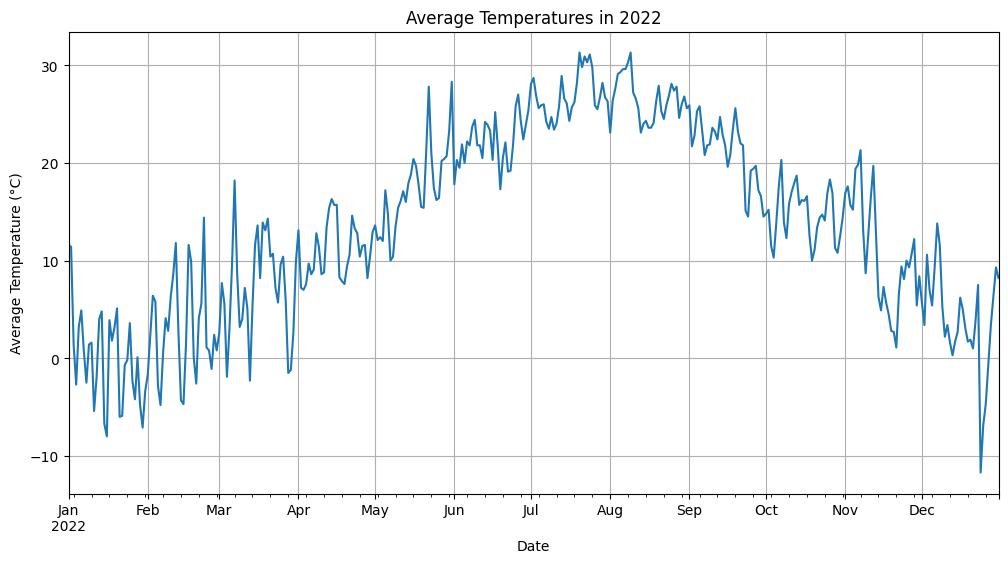

In [80]:
#add chart details to make the graph more easily understood
lineplot1 = df_avgTemp_by_date['avgTemp'].plot(
figsize=(12, 6),  # Larger size
    title='Average Temperatures in 2022',  # Title
    grid=True  # Gridlines
)
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [88]:
# save image to Visualizations folder
# lineplot1.figure.savefig(os.path.join(path, 'Visualizations', 'line_AvgTemp_by_Day.png'),dpi=300, bbox_inches='tight') # Save as PNG with high resolution

# 4. Create a column with the count of trips per day and merge it with the weather dataframe.

#### Aggregate Trips

In [93]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [95]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [97]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [ ]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True) #Renames the column trip_id in the df_group DataFrame to bike_rides_daily.
df = df.merge(df_group, on = "date", how = 'outer', indicator = True) # Merges df and df_group on the date column
print(df['_merge'].value_counts(dropna = False)) 
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp2 = df.set_index('date')

print(df_temp2.columns)

In [100]:
df_temp2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,both
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,both


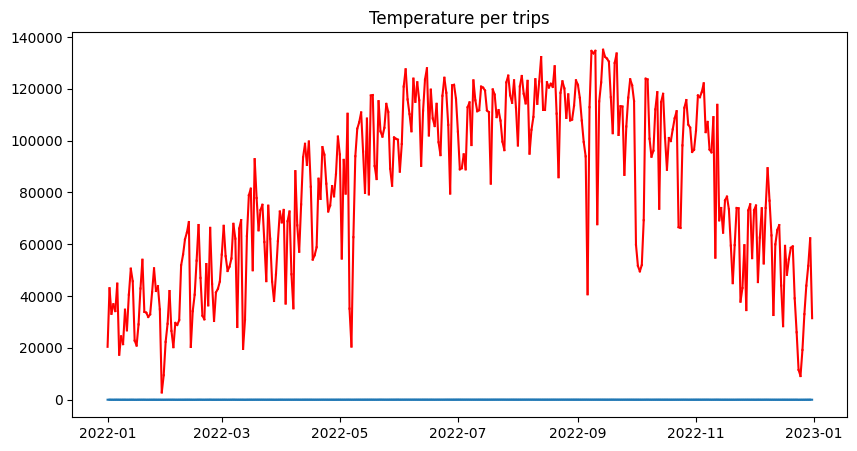

In [111]:
lineplot2 = plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp2['avgTemp'])
plt.plot(df_temp2['bike_rides_daily'], color = 'red')
plt.show()

In [115]:
#save image
#lineplot2.figure.savefig(os.path.join(path, 'Visualizations', 'line_Temperature_per_trip.png'),dpi=300, bbox_inches='tight') # Save as PNG with high resolution

In [121]:
#df_temp2.to_csv(os.path.join(path, 'Data','Prepared_Data', 'WeatherData_with_Bike_Rides_Daily.csv'))

# 5. Create a line chart of bike trip counts and temperatures plotted on a dual axis.

### OO Approach

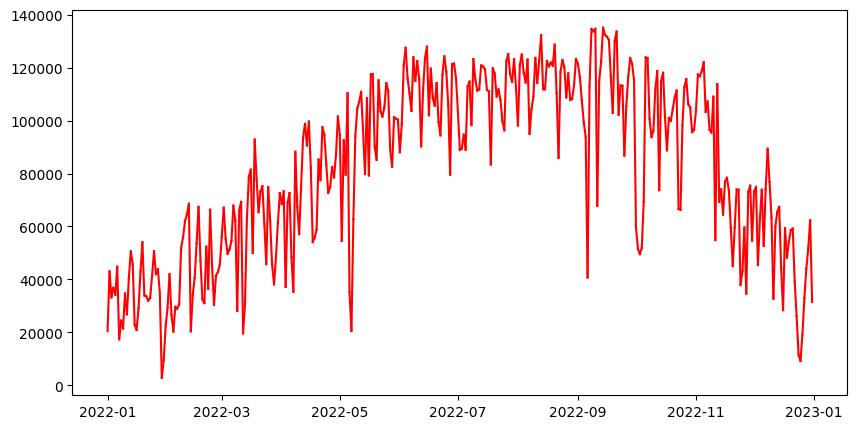

In [125]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp2['bike_rides_daily'],color = "red")

In [131]:
df_temp2.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,both
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,both
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,both


In [133]:
df_temp2.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')

In [160]:
#the original dataset is too large and the values in avgTemp too many to graph properly, so we need to modify the dataset

df_temp3 = df_temp2.groupby('date').agg({
    'avgTemp': 'mean',  # Average temperature
    'bike_rides_daily': 'mean'  # Average bike rides daily
}).reset_index()

In [139]:
#sort values by date
df_temp3 = df_temp3.sort_values(by='date')

# set the index
df_temp3.set_index('date', inplace=True)

df_temp3.head()

,avgTemp,bike_rides_daily
date,,
2022-01-01,11.6,20428.0
2022-01-02,11.4,43009.0
2022-01-03,1.4,33189.0
2022-01-04,-2.7,36842.0
2022-01-05,3.2,34230.0


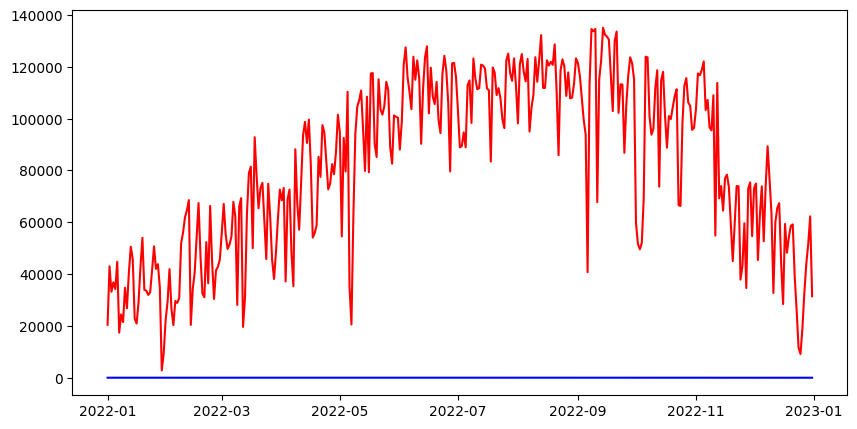

In [141]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp3['bike_rides_daily'],color = "red")
ax.plot(df_temp3['avgTemp'], color = 'blue')

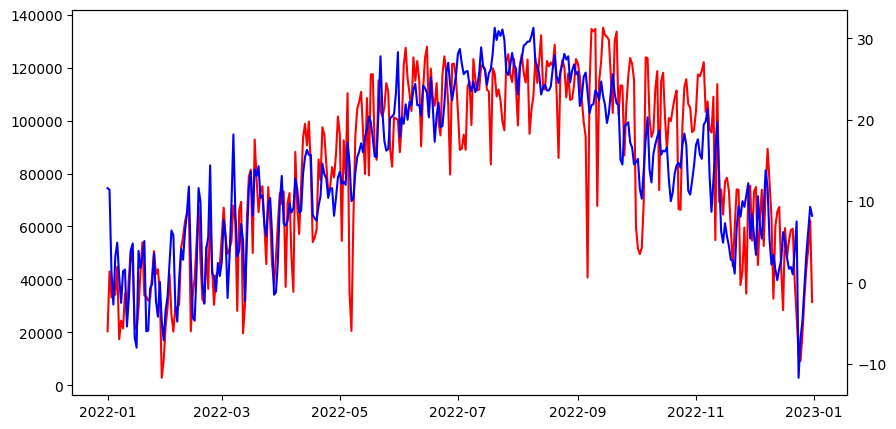

In [143]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp3['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp3["avgTemp"], color = "blue")
plt.show()

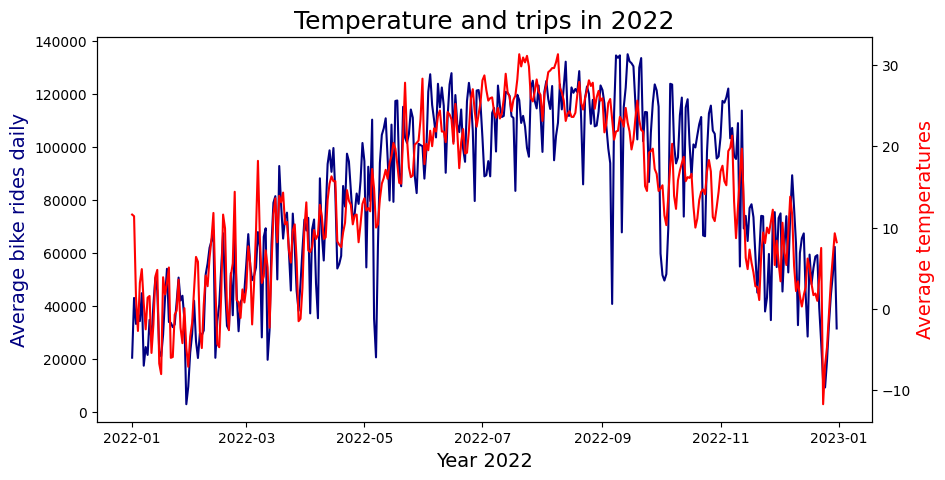

In [147]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp3['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Average bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp3["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [166]:
#fig.savefig(os.path.join(path, 'Visualizations', 'line_avgTemp_avgRideCount_dual_axis.png'),dpi=300, bbox_inches='tight') # Save as PNG with high resolution

# 6. In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

### Dual-Axis Line Plot Explanation

This code uses Matplotlib's procedural interface to create a dual-axis line plot. The goal is to compare two datasets—average temperature (`avgTemp`) and daily bike rides (`bike_rides_daily`)—on the same graph.

#### Steps:
1. **Set Figure Size**:
   - `plt.figure(figsize=(10, 5))`: Defines the size of the graph to ensure readability.

2. **Create the First Line Plot**:
   - `plt.plot(df_temp2['avgTemp'])`: Plots average temperatures (`avgTemp`) as the first line.

3. **Create the Second Line Plot**:
   - `plt.plot(df_temp2['bike_rides_daily'], color='red')`: Overlays daily bike rides (`bike_rides_daily`) on the same graph in red for distinction.

4. **Add a Title and Display**:
   - `plt.title('Temperature per trips')`: Adds a descriptive title to the graph.
   - `plt.show()`: Displays the final graph.

#### Visualization Paradigm:
The code uses the **procedural interface of Matplotlib**, where `plt` commands are used to define and display the entire graph. 
